In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from pandasql import sqldf

import base64
def create_onedrive_directdownload (onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resulturl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resulturl

In [195]:
url=create_onedrive_directdownload('https://1drv.ms/u/s!Ao8apDPz_iMP5xuBplq4Q2ExVen3?e=ykziFg')
#read csv
df = pd.read_csv(url,delimiter=";",encoding='latin-1')

C:\Users\murtubey\AppData\Local\Temp\ipykernel_23592\2818409657.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url,delimiter=";",encoding='latin-1')


In [196]:
df.head()

,Fecha UTC,Hora UTC,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,Calidad dato
0,1/1/2022,23:58,Regular,Doméstico,ATERRIZAJE,IGU,CBA,AEROLINEAS ARGENTINAS SA,BO-737-8HX,71,DEFINITIVO
1,1/1/2022,23:57,No Regular,Doméstico,ATERRIZAJE,AER,EZE,BAIRES FLY SA,LJ-60,0,DEFINITIVO
2,1/1/2022,23:56,Regular,Doméstico,ATERRIZAJE,JUJ,AER,FB LÍNEAS AÉREAS - FLYBONDI,BO-737-8Q8,91,DEFINITIVO
3,1/1/2022,23:55,Regular,Doméstico,ATERRIZAJE,AER,DOZ,AEROLINEAS ARGENTINAS SA,BO-737-800,51,DEFINITIVO
4,1/1/2022,23:50,Regular,Doméstico,ATERRIZAJE,JUJ,AER,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,47,DEFINITIVO


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612486 entries, 0 to 612485
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Fecha UTC                          612486 non-null  object
 1   Hora UTC                           612486 non-null  object
 2   Clase de Vuelo (todos los vuelos)  612486 non-null  object
 3   Clasificación Vuelo                612486 non-null  object
 4   Tipo de Movimiento                 612486 non-null  object
 5   Aeropuerto                         612486 non-null  object
 6   Origen / Destino                   612486 non-null  object
 7   Aerolinea Nombre                   612486 non-null  object
 8   Aeronave                           612486 non-null  object
 9   Pasajeros                          612486 non-null  object
 10  Calidad dato                       612486 non-null  object
dtypes: object(11)
memory usage: 51.4+ MB


In [198]:
#drop calidad dato 
df.drop(['Calidad dato'], axis=1, inplace=True)


In [199]:
#convert Pasajeros column to string
df['Pasajeros'] = df['Pasajeros'].astype(str)
#replace , with .
df['Pasajeros'] = df['Pasajeros'].str.replace(',','.')
#convert Pasajeros column to float
df['Pasajeros'] = df['Pasajeros'].astype(float)

In [200]:
#controlo con una suma
df['Pasajeros'].sum()

28892567.5

In [201]:
# percentage of null values in each column
df.isnull().sum()/len(df)*100


Fecha UTC                            0.0
Hora UTC                             0.0
Clase de Vuelo (todos los vuelos)    0.0
Clasificación Vuelo                  0.0
Tipo de Movimiento                   0.0
Aeropuerto                           0.0
Origen / Destino                     0.0
Aerolinea Nombre                     0.0
Aeronave                             0.0
Pasajeros                            0.0
dtype: float64

In [202]:
#separo la hora y los minutos en dos columnas
df[['Hora','minutos']] = df['Hora UTC'].str.split(':',expand=True)
df[['Hora']].head()

,Hora
0,23
1,23
2,23
3,23
4,23


In [203]:
df.head()

,Fecha UTC,Hora UTC,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,Hora,minutos
0,1/1/2022,23:58,Regular,Doméstico,ATERRIZAJE,IGU,CBA,AEROLINEAS ARGENTINAS SA,BO-737-8HX,71.0,23,58
1,1/1/2022,23:57,No Regular,Doméstico,ATERRIZAJE,AER,EZE,BAIRES FLY SA,LJ-60,0.0,23,57
2,1/1/2022,23:56,Regular,Doméstico,ATERRIZAJE,JUJ,AER,FB LÍNEAS AÉREAS - FLYBONDI,BO-737-8Q8,91.0,23,56
3,1/1/2022,23:55,Regular,Doméstico,ATERRIZAJE,AER,DOZ,AEROLINEAS ARGENTINAS SA,BO-737-800,51.0,23,55
4,1/1/2022,23:50,Regular,Doméstico,ATERRIZAJE,JUJ,AER,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,47.0,23,50


In [204]:
df.columns

Index(['Fecha UTC', 'Hora UTC', 'Clase de Vuelo (todos los vuelos)',
       'Clasificación Vuelo', 'Tipo de Movimiento', 'Aeropuerto',
       'Origen / Destino', 'Aerolinea Nombre', 'Aeronave', 'Pasajeros', 'Hora',
       'minutos'],
      dtype='object')

In [205]:
#renombro las columnas 
df.rename(columns=
        {'Clase de Vuelo (todos los vuelos)': 'clase_vuelo',
        'Tipo de Movimiento': 'movimiento',
        'Aerolinea Nombre':'aerolinea',
        'Fecha UTC':'fecha'
        }, inplace=True)

print(df.columns)

Index(['fecha', 'Hora UTC', 'clase_vuelo', 'Clasificación Vuelo', 'movimiento',
       'Aeropuerto', 'Origen / Destino', 'aerolinea', 'Aeronave', 'Pasajeros',
       'Hora', 'minutos'],
      dtype='object')


In [206]:
#select distinct moviemiento
print(df['movimiento'].unique())
#convert all columns to lower case
df.columns = map(str.lower, df.columns)
df = df.applymap(lambda x: x.lower() if type(x) == str else x)
print(df.columns)



['ATERRIZAJE' 'DESPEGUE' 'Despegue' 'Aterrizaje']
Index(['fecha', 'hora utc', 'clase_vuelo', 'clasificación vuelo', 'movimiento',
       'aeropuerto', 'origen / destino', 'aerolinea', 'aeronave', 'pasajeros',
       'hora', 'minutos'],
      dtype='object')


In [207]:
df['clasificación vuelo'].unique()

array(['doméstico', 'internacional'], dtype=object)

In [208]:
df.columns

Index(['fecha', 'hora utc', 'clase_vuelo', 'clasificación vuelo', 'movimiento',
       'aeropuerto', 'origen / destino', 'aerolinea', 'aeronave', 'pasajeros',
       'hora', 'minutos'],
      dtype='object')

In [209]:
df.rename(columns=
        {'Clase de Vuelo (todos los vuelos)': 'clase_vuelo',
        'Tipo de Movimiento': 'movimiento',
        'Aerolinea Nombre':'aerolinea',
        'Fecha UTC':'fecha'
        }, inplace=True)
df.columns

In [250]:
#obtengo los dias , meses y años de la semana y el periodo

df['fecha']=pd.to_datetime(df['fecha'], format='%d/%m/%Y')
df['dia'] = pd.DatetimeIndex(df['fecha']).day_name()
df['month'] = pd.DatetimeIndex(df['fecha']).month
df['year'] = pd.DatetimeIndex(df['fecha']).year
df['week'] = pd.DatetimeIndex(df['fecha']).week
df['period'] = df['year'].astype(str) + '-' + df['month'].astype(str)
df['period'] = pd.to_datetime(df['period'], format='%Y-%m')
#create a new column as period




C:\Users\murtubey\AppData\Local\Temp\ipykernel_23592\3324647996.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = pd.DatetimeIndex(df['fecha']).week


In [213]:
#control de periodos
df['period'].unique()

array(['2022-01-01T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000', '2022-04-01T00:00:00.000000000',
       '2022-05-01T00:00:00.000000000', '2022-06-01T00:00:00.000000000',
       '2022-07-01T00:00:00.000000000', '2022-08-01T00:00:00.000000000',
       '2022-09-01T00:00:00.000000000', '2022-10-01T00:00:00.000000000',
       '2022-11-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000',
       '2023-01-01T00:00:00.000000000', '2023-02-01T00:00:00.000000000',
       '2023-03-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [214]:
df['pasajeros'].sum()

28892567.5

In [215]:
#analizamos los tipos de vuelo y nos quedamos unicamente con los vuelos de tipo regular 
df.groupby(['clase_vuelo']).agg(
    Pasajeros_Count=('pasajeros','count'),
    Pasajeros_Pct_Total=('pasajeros', lambda x: x.count()*100 / df['pasajeros'].count())
).sort_values(by='Pasajeros_Count', ascending=False).reset_index()

,clase_vuelo,Pasajeros_Count,Pasajeros_Pct_Total
0,regular,339372,55.408940
1,vuelo privado con matrícula nacional,99540,16.251800
2,vuelo escuela,71368,11.652185
3,no regular,53534,8.740445
4,vuelo oficial nacional,37166,6.068057
5,vuelo privado con matrícula extranjera,4826,0.787936
6,vuelo de adiestramiento,4296,0.701404
7,trabajo aéreo,2037,0.332579
8,vuelo oficial extranjero,347,0.056654


In [216]:
#nos quedamos unicamente con los vuelos de tipo regular
df2=df[df['clase_vuelo']=='regular']

In [217]:
df2.head()

,fecha,hora utc,clase_vuelo,clasificación vuelo,movimiento,aeropuerto,origen / destino,aerolinea,aeronave,pasajeros,hora,minutos,dia,month,year,period
0,2022-01-01,23:58,regular,doméstico,aterrizaje,igu,cba,aerolineas argentinas sa,bo-737-8hx,71.0,23,58,Saturday,1,2022,2022-01-01
2,2022-01-01,23:56,regular,doméstico,aterrizaje,juj,aer,fb líneas aéreas - flybondi,bo-737-8q8,91.0,23,56,Saturday,1,2022,2022-01-01
3,2022-01-01,23:55,regular,doméstico,aterrizaje,aer,doz,aerolineas argentinas sa,bo-737-800,51.0,23,55,Saturday,1,2022,2022-01-01
4,2022-01-01,23:50,regular,doméstico,aterrizaje,juj,aer,aerolineas argentinas sa,emb-erj190100igw,47.0,23,50,Saturday,1,2022,2022-01-01
5,2022-01-01,23:49,regular,doméstico,aterrizaje,bar,aer,jetsmart airlines s.a.,aib-a320-232,87.0,23,49,Saturday,1,2022,2022-01-01


In [218]:
#dividimos el dataframe en 4 dataframes para su mejor analisis y ver si los podemos joinear 
# la idea es que la salida y el aterrizaje tengan una sola fila 

dfatedomes= df2[(df2['movimiento'] == 'aterrizaje')& (df2['clasificación vuelo'] == 'doméstico')]
dfatedomes.head()
dfdespedomes= df2[(df2['movimiento'] == 'despegue')& (df2['clasificación vuelo'] == 'doméstico')]
dfateinter= df2[(df2['movimiento'] == 'aterrizaje')& (df2['clasificación vuelo'] == 'internacional')]
dfdespeinter= df2[(df2['movimiento'] == 'despegue')& (df2['clasificación vuelo'] == 'internacional')]
dfdespedomes.head()


print(len(dfatedomes),len(dfdespedomes),len(dfateinter),len(dfdespeinter))


#el largo no coincide por lo que hay que ver que pasa con los datos que no se pueden joinear



134478 135474 34288 35132


In [219]:
#distinct count column aerolinea with value counts
print(dfatedomes['aerolinea'].nunique(),
    dfdespedomes['aerolinea'].nunique(),
    dfateinter['aerolinea'].nunique(),
    dfdespeinter['aerolinea'].nunique()
)


52 67 95 111


In [220]:
#analizamos el dataframe de despegues domesticos y tomamos un caso de estudio para analizar
dfdespedomes[(dfdespedomes['aeronave']=='bo-737-8hx')& (dfdespedomes['pasajeros']>0)]


,fecha,hora utc,clase_vuelo,clasificación vuelo,movimiento,aeropuerto,origen / destino,aerolinea,aeronave,pasajeros,hora,minutos,dia,month,year,period
308,2022-01-01,22:49,regular,doméstico,despegue,gal,aer,aerolineas argentinas sa,bo-737-8hx,53.0,22,49,Saturday,1,2022,2022-01-01
314,2022-01-01,22:25,regular,doméstico,despegue,cba,igu,aerolineas argentinas sa,bo-737-8hx,71.0,22,25,Saturday,1,2022,2022-01-01
374,2022-01-01,19:30,regular,doméstico,despegue,bar,cba,aerolineas argentinas sa,bo-737-8hx,42.0,19,30,Saturday,1,2022,2022-01-01
379,2022-01-01,19:06,regular,doméstico,despegue,aer,gal,aerolineas argentinas sa,bo-737-8hx,40.0,19,06,Saturday,1,2022,2022-01-01
427,2022-01-01,16:29,regular,doméstico,despegue,cba,bar,aerolineas argentinas sa,bo-737-8hx,84.0,16,29,Saturday,1,2022,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612084,2023-03-31,19:55,regular,doméstico,despegue,eca,aer,aerolineas argentinas sa,bo-737-8hx,82.0,19,55,Friday,3,2023,2023-03-01
612284,2023-03-31,21:46,regular,doméstico,despegue,usu,eze,fb líneas aéreas - flybondi,bo-737-8hx,1.0,21,46,Friday,3,2023,2023-03-01
612317,2023-03-31,22:02,regular,doméstico,despegue,eze,igu,aerolineas argentinas sa,bo-737-8hx,71.0,22,02,Friday,3,2023,2023-03-01
612471,2023-03-31,23:47,regular,doméstico,despegue,aer,cba,aerolineas argentinas sa,bo-737-8hx,64.0,23,47,Friday,3,2023,2023-03-01


In [221]:
#distinct month
dfdespedomes['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [248]:
#intentamos crear una clave unica dado que no poseemos el flight id
#concatenate aeronave aeropuerto y pasajeros el obejtivo es crear una clave unica para joinear despegue con aterrizaje

dfdespedomes['clave'] = dfdespedomes['month'].astype(str)+dfdespedomes['year'].astype(str)+dfdespedomes['aeronave'] + dfdespedomes['aeropuerto']+dfdespedomes['origen / destino']+ dfdespedomes['pasajeros'].astype(str)

#distinct count clumn clave
print(dfdespedomes['clave'].nunique())

#len of dataframe
print(len(dfdespedomes))

print('El porcentaje de perdida datos es del',(len(dfdespedomes)-(dfdespedomes['clave'].nunique()))/len(dfdespedomes)*100,'','no se puede crear la clave unica')

C:\Users\murtubey\AppData\Local\Temp\ipykernel_23592\36058766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdespedomes['clave'] = dfdespedomes['month'].astype(str)+dfdespedomes['year'].astype(str)+dfdespedomes['aeronave'] + dfdespedomes['aeropuerto']+dfdespedomes['origen / destino']+ dfdespedomes['pasajeros'].astype(str)


In [226]:
dfdespedomes.head()

,fecha,hora utc,clase_vuelo,clasificación vuelo,movimiento,aeropuerto,origen / destino,aerolinea,aeronave,pasajeros,hora,minutos,dia,month,year,period,clave,week
291,2022-01-01,23:56,regular,doméstico,despegue,cba,aer,jetsmart airlines s.a.,aib-a320-232,62.0,23,56,Saturday,1,2022,2022-01-01,12022aib-a320-232cbaaer62.0,52
295,2022-01-01,23:37,regular,doméstico,despegue,ros,aer,aerolineas argentinas sa,bo-737-8sh,19.0,23,37,Saturday,1,2022,2022-01-01,12022bo-737-8shrosaer19.0,52
296,2022-01-01,23:34,regular,doméstico,despegue,igu,eze,aerolineas argentinas sa,bo-b737-8mb,68.0,23,34,Saturday,1,2022,2022-01-01,12022bo-b737-8mbigueze68.0,52
297,2022-01-01,23:29,regular,doméstico,despegue,sis,cba,aerolineas argentinas sa,emb-erj190100igw,32.0,23,29,Saturday,1,2022,2022-01-01,12022emb-erj190100igwsiscba32.0,52
300,2022-01-01,23:23,regular,doméstico,despegue,aer,tuc,aerolineas argentinas sa,bo-b737-8sh,75.0,23,23,Saturday,1,2022,2022-01-01,12022bo-b737-8shaertuc75.0,52


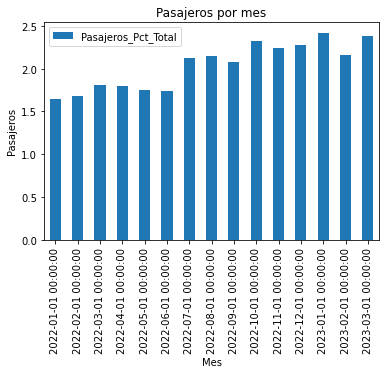

In [227]:
#pasajeros Domesticos

#metricas de tiempo - Cuando se viaja mas - cuando se viaja menos - cuando hay mas pasajeros y cuando menos pasajeros

dfgrupedperiod=dfdespedomes.groupby(['period']).agg(
    Pasajeros_Sum=('pasajeros', 'sum'),
    Q_viajes=('pasajeros', 'count'),
    Detalle_mes=('month', 'unique'),
    Pasajeros_Pct_Total=('pasajeros', lambda x: x.sum()*100 / df['pasajeros'].sum())
).sort_values(by='period', ascending=False).reset_index()

#plot grouped data barchar
dfgrupedperiod.sort_values(by='period', ascending=True).plot.bar(x='period', y='Pasajeros_Pct_Total', rot=90)
#color blue
plt.title('Pasajeros por mes')
plt.xlabel('Mes')
plt.ylabel('Pasajeros')
plt.show()

Text(0, 0.5, 'Pasajeros')

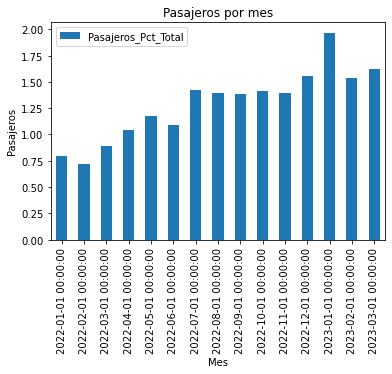

In [228]:
#pasajeros Internacionales 

#metricas de tiempo - Cuando se viaja mas - cuando se viaja menos - cuando hay mas pasajeros y cuando menos pasajeros

dfgrupedperiodint=dfdespeinter.groupby(['period']).agg(
    Pasajeros_Sum=('pasajeros', 'sum'),
    Q_viajes=('pasajeros', 'count'),
    Detalle_mes=('month', 'unique'),
    Pasajeros_Pct_Total=('pasajeros', lambda x: x.sum()*100 / df['pasajeros'].sum())
).sort_values(by='period', ascending=False).reset_index()

#plot grouped data barchar
graph2 = dfgrupedperiodint.sort_values(by='period', ascending=True).plot.bar(x='period', y='Pasajeros_Pct_Total', rot=90)
graph2.set_title('Pasajeros por mes')
graph2.set_xlabel('Mes')
graph2.set_ylabel('Pasajeros')

In [229]:

# calculate the sum, count, max, and percentage of total for the 'Pasajeros' and 'days' columns
dfgroupedAero=dfdespedomes.groupby(['period','aeropuerto']).agg(
    Pasajeros_Sum=('pasajeros', 'sum'),
    Pasajeros_Count=('pasajeros', 'count'),
    Pasajeros_Pct_Total=('pasajeros', lambda x: x.sum()*100 / df['pasajeros'].sum())
).sort_values(by='Pasajeros_Sum', ascending=False).reset_index()

#mes con mas viajes
per=dfgrupedperiod[dfgrupedperiod['Pasajeros_Sum']==dfgrupedperiod['Pasajeros_Sum'].max()]['period']
#lo convierto a string para poder meterlo en le df de aeropuertos
per=per.to_string(index=False)

#busco del mes con mas pasajeros cual es el eropuerto que mas traccciono
dfae=dfgroupedAero[(dfgroupedAero['period']==per)]
dfae[dfae['Pasajeros_Sum']==dfae['Pasajeros_Sum'].max()]

,period,aeropuerto,Pasajeros_Sum,Pasajeros_Count,Pasajeros_Pct_Total
4,2023-01-01,aer,239159.0,3607,0.827753


In [238]:

# calculate the sum, count, max, and percentage of total for the 'Pasajeros' and 'days' columns
dfgroupedAeroint=dfdespeinter.groupby(['period','aeropuerto']).agg(
    Pasajeros_Sum=('pasajeros', 'sum'),
    Pasajeros_Count=('pasajeros', 'count'),
    Pasajeros_Pct_Total=('pasajeros', lambda x: x.sum()*100 / df['pasajeros'].sum())
).sort_values(by='Pasajeros_Sum', ascending=False).reset_index()

#mes con mas viajes
perint=dfgrupedperiodint[dfgrupedperiodint['Pasajeros_Sum']==dfgrupedperiodint['Pasajeros_Sum'].max()]['period']
#lo convierto a string para poder meterlo en le df de aeropuertos
perint=perint.to_string(index=False)

#busco del mes con mas pasajeros cual es el eropuerto que mas traccciono
dfaeint=dfgroupedAeroint[(dfgroupedAeroint['period']==per)]
dfaeint[dfaeint['Pasajeros_Sum']==dfaeint['Pasajeros_Sum'].max()]

,period,aeropuerto,Pasajeros_Sum,Pasajeros_Count,Pasajeros_Pct_Total
0,2023-01-01,eze,361577.0,1803,1.251453


Text(0, 0.5, 'Total Pasajeros')

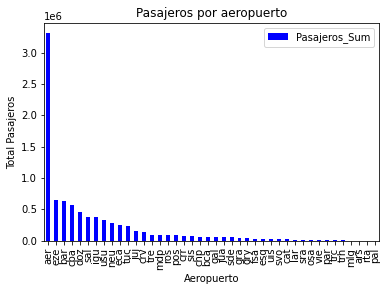

In [230]:
dfgroupedaeros=dfdespedomes.groupby(['aeropuerto']).agg(
    Pasajeros_Sum=('pasajeros', 'sum'),
    Pasajeros_Count=('pasajeros', 'count'),
    Pasajeros_Pct_Total=('pasajeros', lambda x: x.sum()*100 / df['pasajeros'].sum())
).sort_values(by='Pasajeros_Sum', ascending=False).reset_index()


# sort the data
fgroupedpasajeros_sorted = dfgroupedaeros.sort_values(by='Pasajeros_Sum', ascending=False)

# create the bar plot
graph = fgroupedpasajeros_sorted.plot.bar(x='aeropuerto', y='Pasajeros_Sum', rot=90, color='blue')

# set plot title and axis labels
graph.set_title('Pasajeros por aeropuerto')
graph.set_xlabel('Aeropuerto')
graph.set_ylabel('Total Pasajeros')






Text(0, 0.5, 'Total Pasajeros')

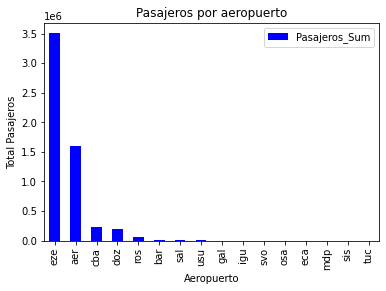

In [252]:
#pasajeros internacionales 
dfgroupedaeros_inter=dfdespeinter.groupby(['aeropuerto']).agg(
    Pasajeros_Sum=('pasajeros', 'sum'),
    Pasajeros_Count=('pasajeros', 'count'),
    Pasajeros_Pct_Total=('pasajeros', lambda x: x.sum()*100 / df['pasajeros'].sum())
).sort_values(by='Pasajeros_Sum', ascending=False).reset_index()


# sort the data
fgroupedpasajeros_sorted_inter = dfgroupedaeros_inter.sort_values(by='Pasajeros_Sum', ascending=False)

# create the bar plot
graph2 = fgroupedpasajeros_sorted_inter.plot.bar(x='aeropuerto', y='Pasajeros_Sum', rot=90, color='blue')

# set plot title and axis labels
graph2.set_title('Pasajeros por aeropuerto')
graph2.set_xlabel('Aeropuerto')
graph2.set_ylabel('Total Pasajeros')




In [240]:
#Hora que mas se viaja y que menos se viaja vuelos nacionales 

#se agrupa por hora 
dfgroupedhoras=dfdespedomes.groupby(['hora']).agg(
    Pasajeros_Sum=('pasajeros', 'sum'),
    Q_vuelos=('pasajeros', 'count'),
).sort_values(by='Pasajeros_Sum', ascending=False).reset_index()

#select hora where pasajeros sum is max
hora_mas_pasajeros=dfgroupedhoras[dfgroupedhoras['Pasajeros_Sum']==dfgroupedhoras['Pasajeros_Sum'].max()]
#select hora where pasajeros Q_vuelos is maz
hora_max_vuelos=dfgroupedhoras[dfgroupedhoras['Q_vuelos']==dfgroupedhoras['Q_vuelos'].max()]

#select hora where pasajeros sum is max
hora_min_pasajeros=dfgroupedhoras[dfgroupedhoras['Pasajeros_Sum']==dfgroupedhoras['Pasajeros_Sum'].min()]
#select hora where pasajeros Q_vuelos is maz
hora_min_vuelos=dfgroupedhoras[dfgroupedhoras['Q_vuelos']==dfgroupedhoras['Q_vuelos'].min()]
#print the results wihout index
print('La hora que mas pasajeros eligen viajar',hora_mas_pasajeros['hora'].to_string(index=False))
print('La hora que mas aeronabes despegan es',hora_max_vuelos['hora'].to_string(index=False))
print('La hora que menos pasajeros eligen viajar',hora_min_pasajeros['hora'].to_string(index=False))
print('La hora que menos  aeronabes despegan es',hora_min_vuelos['hora'].to_string(index=False))

La hora que mas pasajeros eligen viajar 16
La hora que mas aeronabes despegan es 16
La hora que menos pasajeros eligen viajar 06
La hora que menos  aeronabes despegan es 06


In [253]:
#repetimos para los vuelos internacionales 

#se agrupa por hora 
dfgroupedhoras_inter=dfdespeinter.groupby(['hora']).agg(
    Pasajeros_Sum=('pasajeros', 'sum'),
    Q_vuelos=('pasajeros', 'count'),
).sort_values(by='Pasajeros_Sum', ascending=False).reset_index()

#select hora where pasajeros sum is max
hora_mas_pasajeros_inter=dfgroupedhoras_inter[dfgroupedhoras_inter['Pasajeros_Sum']==dfgroupedhoras_inter['Pasajeros_Sum'].max()]
#select hora where pasajeros Q_vuelos is maz
hora_max_vuelos_inter=dfgroupedhoras_inter[dfgroupedhoras_inter['Q_vuelos']==dfgroupedhoras_inter['Q_vuelos'].max()]

#select hora where pasajeros sum is max
hora_min_pasajeros_inter=dfgroupedhoras_inter[dfgroupedhoras_inter['Pasajeros_Sum']==dfgroupedhoras_inter['Pasajeros_Sum'].min()]
#select hora where pasajeros Q_vuelos is maz
hora_min_vuelos_inter=dfgroupedhoras_inter[dfgroupedhoras_inter['Q_vuelos']==dfgroupedhoras_inter['Q_vuelos'].min()]
#print the results wihout index
print('La hora que mas pasajeros eligen viajar',hora_mas_pasajeros_inter['hora'].to_string(index=False))
print('La hora que mas aeronabes despegan es',hora_max_vuelos_inter['hora'].to_string(index=False))
print('La hora que menos pasajeros eligen viajar',hora_min_pasajeros_inter['hora'].to_string(index=False))
print('La hora que menos  aeronabes despegan es',hora_min_vuelos_inter['hora'].to_string(index=False))


La hora que mas pasajeros eligen viajar 01
La hora que mas aeronabes despegan es 00
La hora que menos pasajeros eligen viajar 06
La hora que menos  aeronabes despegan es 06


In [255]:
#aerolinea que mas se viaja y que menos se viaja
dfgroupedaerolinea_dom=dfdespedomes.groupby(['aerolinea']).agg(
    Pasajeros_Sum=('pasajeros', 'sum'),
    Q_vuelos=('pasajeros', 'count'),
).sort_values(by='Pasajeros_Sum', ascending=False).reset_index()


# la aerolinea con mayor vuelos domesticos y pasajeros es la siguiente 
print('la aerolinea con mas viajes domesticos es  ',dfgroupedaerolinea_dom['aerolinea'].loc[0])

la aerolinea con mas viajes es  aerolineas argentinas sa


In [256]:
dfgroupedaerolinea=dfdespeinter.groupby(['aerolinea']).agg(
    Pasajeros_Sum=('pasajeros', 'sum'),
    Q_vuelos=('pasajeros', 'count'),
).sort_values(by='Pasajeros_Sum', ascending=False).reset_index()


# la aerolinea con mayor vuelos domesticos y pasajeros es la siguiente 
print('la aerolinea con mas viajes es internacionales es  ',dfgroupedaerolinea['aerolinea'].loc[0])

la aerolinea con mas viajes es internacionales es   aerolineas argentinas sa
